# Google My Business Locations Insights for Element Coffee

#### Retrieve Location Metrics in Google My Business

## Executive Summary

The Google My Business API provides you with several location insights and metrics.

For each location, the following metrics are available for you to analyse:

- The frequency that the resource was shown when the location is searched for directly.
- The frequency that the resource was shown as a result of a categorical search, such as for a restaurant.
- How many times that the resource was viewed on Google Search.
- How many times that the local post was viewed on Google Search.
- How many times that the resource was viewed on Google Maps.
- How many times that the website was clicked.
- How many times that the phone number was clicked.
- How many times that the driving directions were requested.
- How many times that the call-to-action button was clicked.
- The amount of views of photos uploaded by the merchant.
- The total number of photos that are currently live that were uploaded by the merchant.

In [ ]:
import os.path
import requests
import time
import json

import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obtain Insights from Google 02Auth Playground

In [2]:
# Cell missing data intentionally
headers = {'Content-Length': '390', 'Content-Type': 'application/json', 'Authorization': '',
          }
accountId = 
locationId = 
URI = f'https://mybusiness.googleapis.com/v4/accounts/{accountId}/locations:reportInsights'
# body of the POST request
data = {
  "locationNames": [
    f"accounts/{accountId}/locations/{locationId}"
  ],
  "basicRequest": {
          "metricRequests": [
             {
               "metric": "ALL"
             },
   
          ],
          "timeRange": {
               "startTime": "2019-04-22T01:01:23.045123456Z",
               "endTime": "2020-10-20T23:59:59.045123456Z"
          }
    }
}
# Jsonify the data object
data = json.dumps(data)

SyntaxError: invalid syntax (<ipython-input-2-ecb0c41e2f26>, line 4)

In [ ]:
r = requests.post(URI, headers=headers, data=data)
print(f'status code: {r.status_code}')
result = r.json()
result

### Save data to JSON file

In [57]:
with open('C:/Users/kamik/code/projects/element_coffee/review_analysis/insights_data.json', 'w') as outfile:
    json.dump(result, outfile)

## Load data into DataFrame from JSON file

In [2]:
with open('insights_data.json') as json_file:
    data = json.load(json_file)

In [3]:
# data

In [4]:
df = pd.DataFrame.from_dict(json_normalize(data['locationMetrics'][0]['metricValues']), orient='columns')

In [7]:
df['metric'][13] = 'LOCAL_POST_ACTIONS_CALL_TO_ACTION'

In [8]:
df

,metric,totalValue.metricOption,totalValue.timeDimension.timeRange.startTime,totalValue.timeDimension.timeRange.endTime,totalValue.value
0,QUERIES_DIRECT,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,18853
1,QUERIES_INDIRECT,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,59843
2,QUERIES_CHAIN,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,1109
3,VIEWS_MAPS,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,103922
4,VIEWS_SEARCH,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,16680
5,ACTIONS_WEBSITE,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,1050
6,ACTIONS_PHONE,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,0
7,ACTIONS_DRIVING_DIRECTIONS,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,659
8,PHOTOS_VIEWS_MERCHANT,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,79389
9,PHOTOS_VIEWS_CUSTOMERS,AGGREGATED_TOTAL,2019-04-22T01:01:23.045123456Z,2020-10-20T23:59:59.045123456Z,102945


In [9]:
df.shape

(14, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
metric                                          14 non-null object
totalValue.metricOption                         14 non-null object
totalValue.timeDimension.timeRange.startTime    14 non-null object
totalValue.timeDimension.timeRange.endTime      14 non-null object
totalValue.value                                14 non-null object
dtypes: object(5)
memory usage: 688.0+ bytes


## Legend for Metric Type:
- QUERIES_DIRECT:	The number of times the resource was shown when searching for the location directly.
- QUERIES_INDIRECT:	The number of times the resource was shown as a result of a categorical search (for example, restaurant).
- QUERIES_CHAIN:	The number of times a resource was shown as a result of a search for the chain it belongs to, or a brand it sells. For example, Starbucks, Adidas. This is a subset of QUERIES_INDIRECT.
- VIEWS_MAPS:	The number of times the resource was viewed on Google Maps.
- VIEWS_SEARCH:	The number of times the resource was viewed on Google Search.
- ACTIONS_WEBSITE:	The number of times the website was clicked.
- ACTIONS_PHONE:	The number of times the phone number was clicked.
- ACTIONS_DRIVING_DIRECTIONS:	The number of times driving directions were requested.
- PHOTOS_VIEWS_MERCHANT:	The number of views on media items uploaded by the merchant.
- PHOTOS_VIEWS_CUSTOMERS:	The number of views on media items uploaded by customers.
- PHOTOS_COUNT_MERCHANT:	The total number of media items that are currently live that have been uploaded by the merchant.
- PHOTOS_COUNT_CUSTOMERS:	The total number of media items that are currently live that have been uploaded by customers.
- LOCAL_POST_VIEWS_SEARCH:	The number of times the local post was viewed on Google Search.
- LOCAL_POST_ACTIONS_CALL_TO_ACTION:	The number of times the call to action button was clicked on Google.

## Data Cleansing

In [11]:
df.rename(columns={'totalValue.value':'Aggregated_Totals'}, inplace=True)

In [12]:
# Change Aggregated_Totals values from objects to Integers
df['Aggregated_Totals'] = df['Aggregated_Totals'].apply(lambda x: int(x))

In [13]:
# df.metric[13] = 'LOCAL_POST_ACTIONS_CALL_TO_ACTION'	
df.drop(columns=['totalValue.metricOption', 'totalValue.timeDimension.timeRange.startTime', 'totalValue.timeDimension.timeRange.endTime'], inplace=True)

In [14]:
# df.plot(kind='bar')

In [15]:
df = df.T.squeeze()

In [16]:
df.columns = df.loc['metric'].values

In [17]:
df.drop(['metric'], inplace=True)

In [20]:
df = df.T

In [21]:
df

,Aggregated_Totals
QUERIES_DIRECT,18853
QUERIES_INDIRECT,59843
QUERIES_CHAIN,1109
VIEWS_MAPS,103922
VIEWS_SEARCH,16680
ACTIONS_WEBSITE,1050
ACTIONS_PHONE,0
ACTIONS_DRIVING_DIRECTIONS,659
PHOTOS_VIEWS_MERCHANT,79389
PHOTOS_VIEWS_CUSTOMERS,102945


## Exploratory Data Analysis

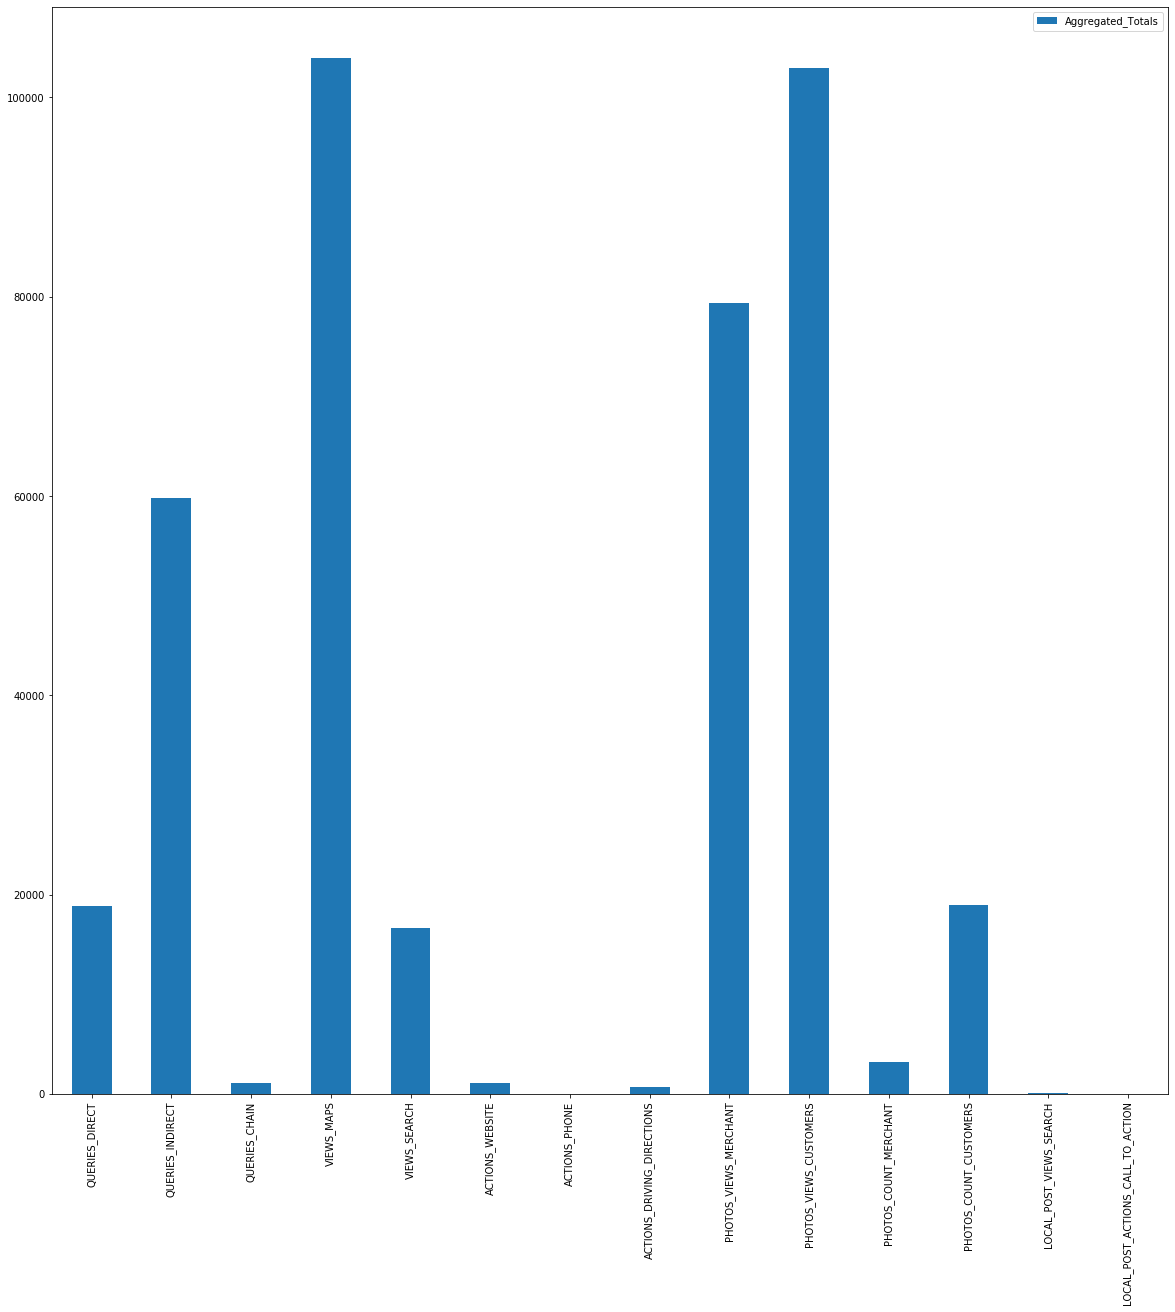

In [23]:
# All insights plot
df.plot(kind='bar', figsize=(20,20))

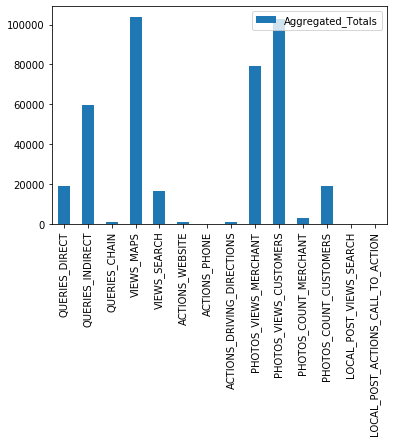

In [33]:
# Queries Direct Vs Indirect:
df.plot(kind='bar')

## Recommendation 

Obtain results for each month for a time series analysis 